In [1]:
import os
import numpy as np
from numpy.linalg import eigvalsh
import math
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, kron
from itertools import product, combinations
import plotly.graph_objects as go
from scipy.linalg import expm, sinm, cosm

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 14})  # Change 12 to the desired font size
# Enable LaTeX rendering in Matplotlib
plt.rc('text', usetex=True)
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.set_printoptions(edgeitems=10)  # Set the number of elements at the beginning and end of each dimension when repr is called
np.set_printoptions(threshold=1000)  # Set the total number of array elements which trigger summarization rather than full repr
np.set_printoptions(precision=4)  # Set the precision for floating point output

ar = np.array
kr = np.kron
T = np.transpose

from MDS import *

pauli_z=ar([[1,0],[0,-1]])
pauli_y=ar([[0,-1j],[1j,0]])
pauli_x=ar([[0,1],[1,0]])

mds_from_d_3D = MDS(3,dissimilarity='euclidean')
mds_from_d_2D = MDS(2,dissimilarity='euclidean')


I check that I get the same 3D plot with my own MDSing and the MDS I got online. 

Fndamentally, it all comes from me not getting the same X matrix

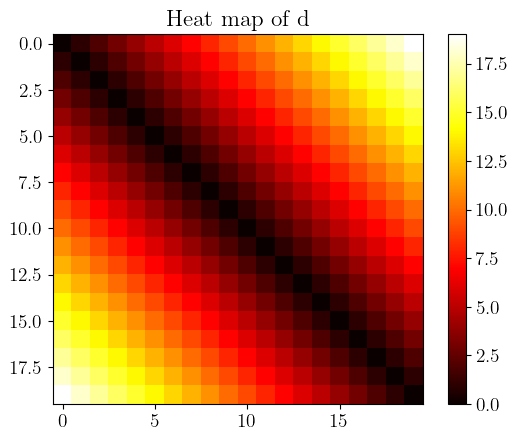

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



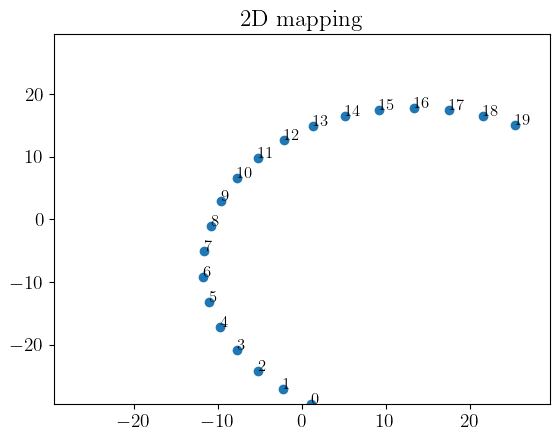

In [12]:
N=20
dab=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        dab[i][j]=abs(i-j)

#dab += np.random.randn(N, N)/10
plt.imshow(dab, cmap='hot', interpolation='nearest')
plt.title("Heat map of d")
plt.colorbar()
plt.show()

mapData(dab)



/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/si

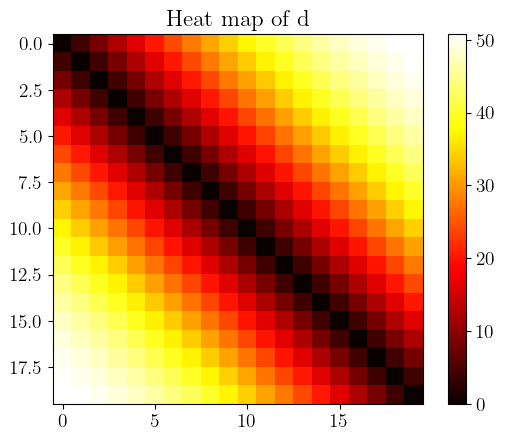

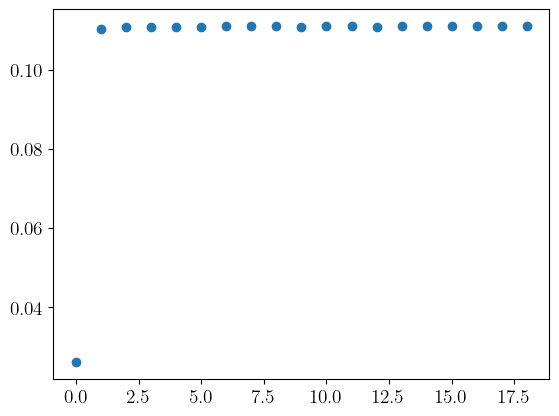

In [18]:
X=[]
d_e_list=[]
stress=[]
for i in range(N-1):
    X=MDS(i+1,dissimilarity='euclidean').fit_transform(dab)
    d_e_list.append(euclidean_distance(X))

plt.imshow(d_e_list[1], cmap='hot', interpolation='nearest')
plt.title("Heat map of d")
plt.colorbar()
plt.show()

for i in range(N-1):
    d_e=d_e_list[i]
    p1=sum([dab[p][q]*d_e[p][q] for p in range(N) for q in range(N)])**2
    p2=sum([dab[p][q]**2 for p in range(N) for q in range(N)])
    p3=sum([d_e[p][q]**2 for p in range(N) for q in range(N)])
    stress.append(np.sqrt(1-(p1/(p2*p3))))

plt.scatter(range(len(stress)),stress)

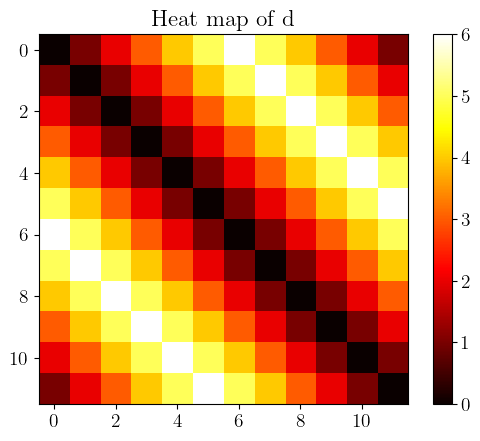

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



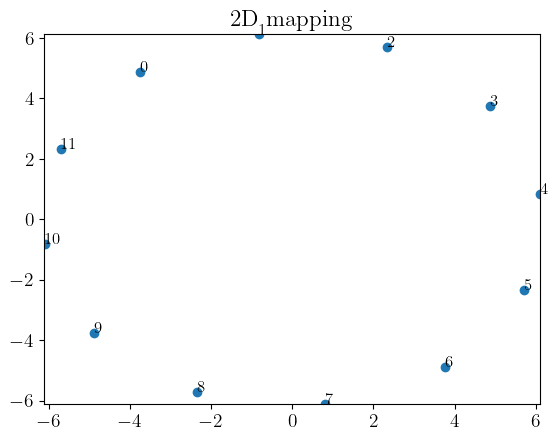

In [5]:
dab=ar([[0,1,2,3,4,5,6,5,4,3,2,1],[1,0,1,2,3,4,5,6,5,4,3,2],[2,1,0,1,2,3,4,5,6,5,4,3],[3,2,1,0,1,2,3,4,5,6,5,4],[4,3,2,1,0,1,2,3,4,5,6,5],[5,4,3,2,1,0,1,2,3,4,5,6],[6,5,4,3,2,1,0,1,2,3,4,5],[5,6,5,4,3,2,1,0,1,2,3,4],[4,5,6,5,4,3,2,1,0,1,2,3],[3,4,5,6,5,4,3,2,1,0,1,2],[2,3,4,5,6,5,4,3,2,1,0,1],[1,2,3,4,5,6,5,4,3,2,1,0]])

#dab += np.random.randn(N, N)/10
plt.imshow(dab, cmap='hot', interpolation='nearest')
plt.title("Heat map of d")
plt.colorbar()
plt.show()

mapData(dab)

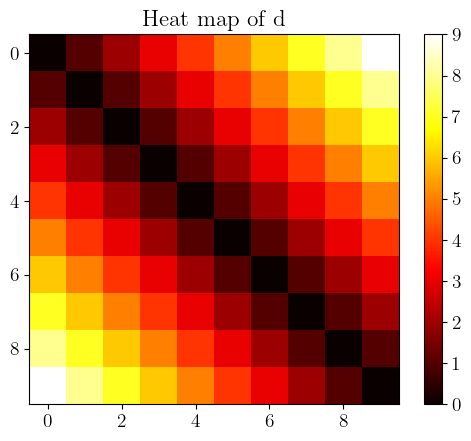

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



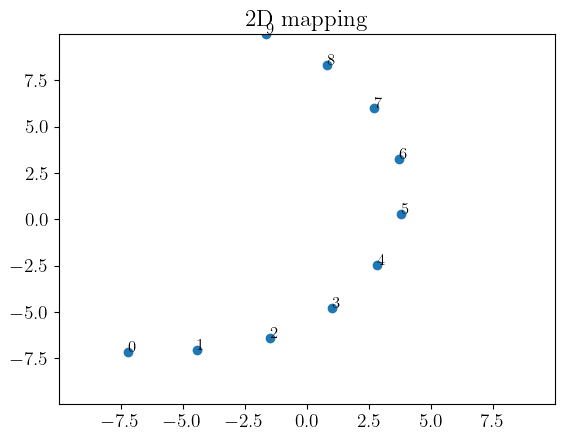

In [4]:
#dab=ar([[0,1,2,3,4,5,6,5,4,3,2,1],[1,0,1,2,3,4,5,6,5,4,3,2],[2,1,0,1,2,3,4,5,6,5,4,3],[3,2,1,0,1,2,3,4,5,6,5,4],[4,3,2,1,0,1,2,3,4,5,6,5],[5,4,3,2,1,0,1,2,3,4,5,6],[6,5,4,3,2,1,0,1,2,3,4,5],[5,6,5,4,3,2,1,0,1,2,3,4],[4,5,6,5,4,3,2,1,0,1,2,3],[3,4,5,6,5,4,3,2,1,0,1,2],[2,3,4,5,6,5,4,3,2,1,0,1],[1,2,3,4,5,6,5,4,3,2,1,0]])
dab=ar([[0,1,2,3,4,5,6,7,8,9],[1,0,1,2,3,4,5,6,7,8],[2,1,0,1,2,3,4,5,6,7],[3,2,1,0,1,2,3,4,5,6],[4,3,2,1,0,1,2,3,4,5],[5,4,3,2,1,0,1,2,3,4],[6,5,4,3,2,1,0,1,2,3],[7,6,5,4,3,2,1,0,1,2],[8,7,6,5,4,3,2,1,0,1],[9,8,7,6,5,4,3,2,1,0]], dtype=np.float32)

#dab += np.random.randn(N, N)/10
plt.imshow(dab, cmap='hot', interpolation='nearest')
plt.title("Heat map of d")
plt.colorbar()
plt.show()

mapData(dab)

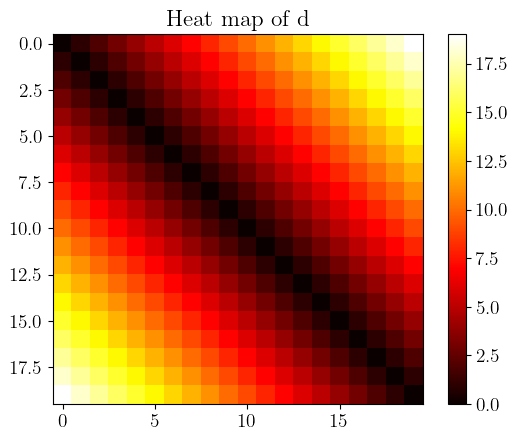

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


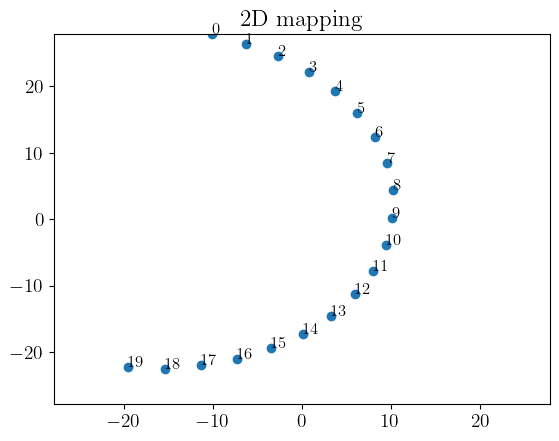

In [2]:
N=20
dab=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        dab[i][j]=abs(i-j)

#dab += np.random.randn(N, N)/10
plt.imshow(dab, cmap='hot', interpolation='nearest')
plt.title("Heat map of d")
plt.colorbar()
plt.show()

mapData(dab)



/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



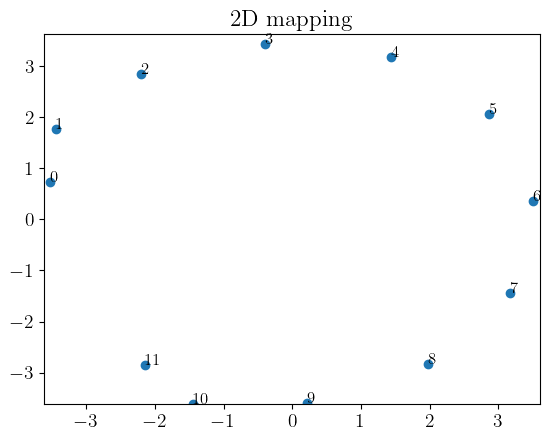

In [6]:
file_name="bell_superp_no_BC"
dab=load_d(file_name)
mapData(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



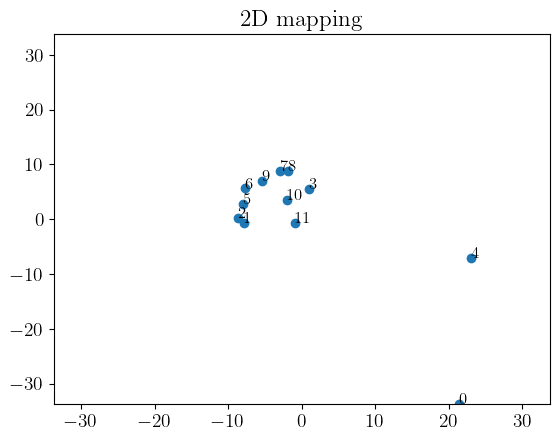

In [7]:
file_name="couplings_J_avg"
dab=load_d(file_name)
mapData(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



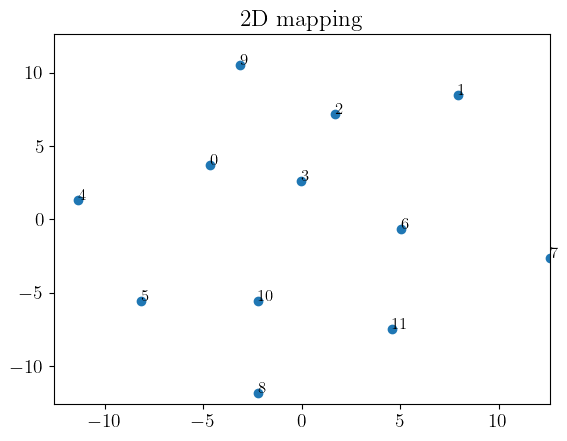

In [8]:
file_name="couplings_12_0"
dab=load_d(file_name)
mapData(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



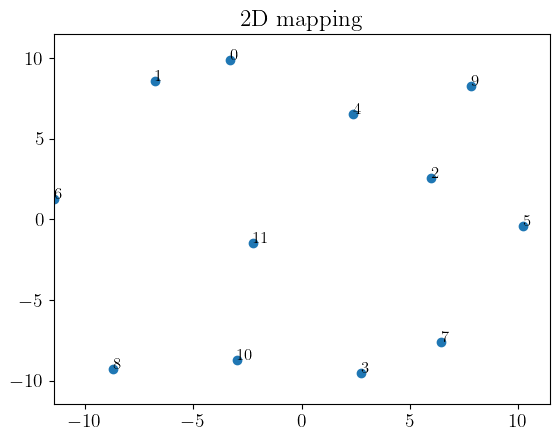

In [9]:
file_name="couplings_12_1"
dab=load_d(file_name)
mapData(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



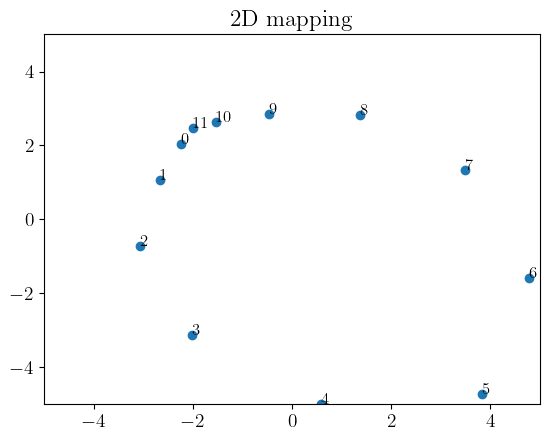

In [10]:
file_name="thermal_20"
dab=load_d(file_name)
mapData(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



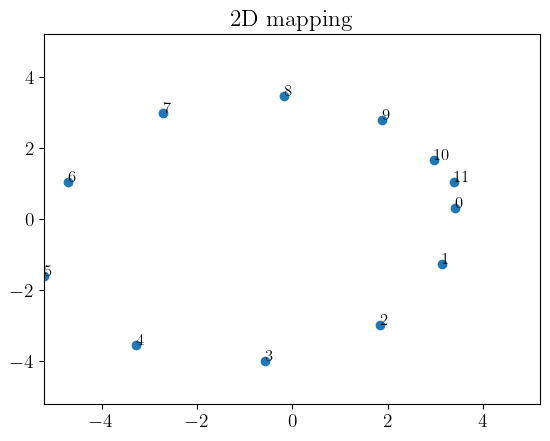

In [11]:
file_name="thermal_8"
dab=load_d(file_name)
mapData(dab)

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_mds.py:626: UserWarning:

The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.



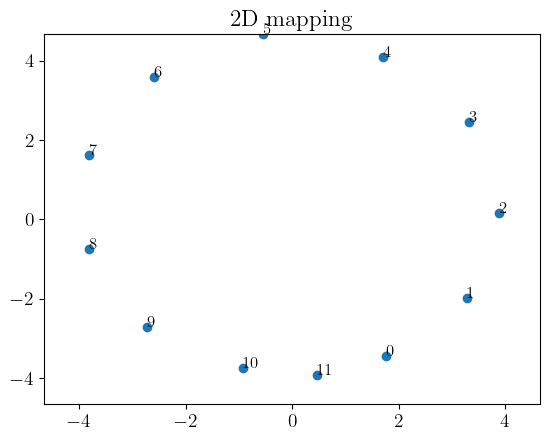

In [12]:
file_name="thermal_3"
dab=load_d(file_name)
mapData(dab)